In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [100]:
df = pd.read_csv('loan_approval_dataset.csv')

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

print(f"Dataset loaded: {df.shape[0]} loans, {df.shape[1]} features")
print(f"Columns: {list(df.columns)}")

df.head()

Dataset loaded: 4269 loans, 13 features
Columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [101]:
# Dataset overview
print("Dataset Info:")
df.info()
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("\nTarget distribution:")
print(df['loan_status'].value_counts())
print(f"\nClass imbalance ratio: {df['loan_status'].value_counts().iloc[0] / df['loan_status'].value_counts().iloc[1]:.2f}:1")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB

Missing values:

In [102]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Handle missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print(f"\nMissing values after cleaning: {df.isnull().sum().sum()}")

Missing values per column:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Missing values after cleaning: 0


In [103]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['education', 'self_employed', 'loan_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Categorical encoding completed")
print("\nEncoded dataset:")
df.head()

Categorical encoding completed

Encoded dataset:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [104]:
# Prepare features and target
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

Features shape: (4269, 11)
Target shape: (4269,)
Feature columns: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [105]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())

Training set: 3415 samples
Test set: 854 samples

Training set class distribution:
loan_status
0    2125
1    1290
Name: count, dtype: int64


In [106]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

Feature scaling completed


In [107]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Results (Original Data):")
print(classification_report(y_test, lr_pred))
print(f"F1-Score: {f1_score(y_test, lr_pred):.3f}")

Logistic Regression Results (Original Data):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

F1-Score: 0.896


In [108]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Results (Original Data):")
print(classification_report(y_test, dt_pred))
print(f"F1-Score: {f1_score(y_test, dt_pred):.3f}")

Decision Tree Results (Original Data):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.97      0.96      0.97       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

F1-Score: 0.966


In [109]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set: {X_train.shape[0]} samples")
print(f"SMOTE training set: {X_train_smote.shape[0]} samples")
print(f"\nSMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

Original training set: 3415 samples
SMOTE training set: 4250 samples

SMOTE class distribution:
loan_status
1    2125
0    2125
Name: count, dtype: int64


In [110]:
# Train models on SMOTE data
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
lr_smote_pred = lr_smote.predict(X_test_scaled)

print("Logistic Regression Results (SMOTE Data):")
print(classification_report(y_test, lr_smote_pred))
print(f"F1-Score: {f1_score(y_test, lr_smote_pred):.3f}")

Logistic Regression Results (SMOTE Data):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

F1-Score: 0.910


In [111]:
# Decision Tree on SMOTE data
X_train_smote_unscaled, y_train_smote_unscaled = smote.fit_resample(X_train, y_train)

dt_smote = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_smote.fit(X_train_smote_unscaled, y_train_smote_unscaled)
dt_smote_pred = dt_smote.predict(X_test)

print("Decision Tree Results (SMOTE Data):")
print(classification_report(y_test, dt_smote_pred))
print(f"F1-Score: {f1_score(y_test, dt_smote_pred):.3f}")

Decision Tree Results (SMOTE Data):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.98      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

F1-Score: 0.972


In [112]:
# Compare all models
models = {
    'Logistic Regression (Original)': lr_pred,
    'Decision Tree (Original)': dt_pred,
    'Logistic Regression (SMOTE)': lr_smote_pred,
    'Decision Tree (SMOTE)': dt_smote_pred
}

print("Model Comparison Summary:")
print("=" * 50)
for name, pred in models.items():
    f1 = f1_score(y_test, pred)
    print(f"{name}: F1-Score = {f1:.3f}")

# Best model
best_model = max(models.items(), key=lambda x: f1_score(y_test, x[1]))
print(f"\nBest performing model: {best_model[0]}")
print(f"Best F1-Score: {f1_score(y_test, best_model[1]):.3f}")

Model Comparison Summary:
Logistic Regression (Original): F1-Score = 0.896
Decision Tree (Original): F1-Score = 0.966
Logistic Regression (SMOTE): F1-Score = 0.910
Decision Tree (SMOTE): F1-Score = 0.972

Best performing model: Decision Tree (SMOTE)
Best F1-Score: 0.972


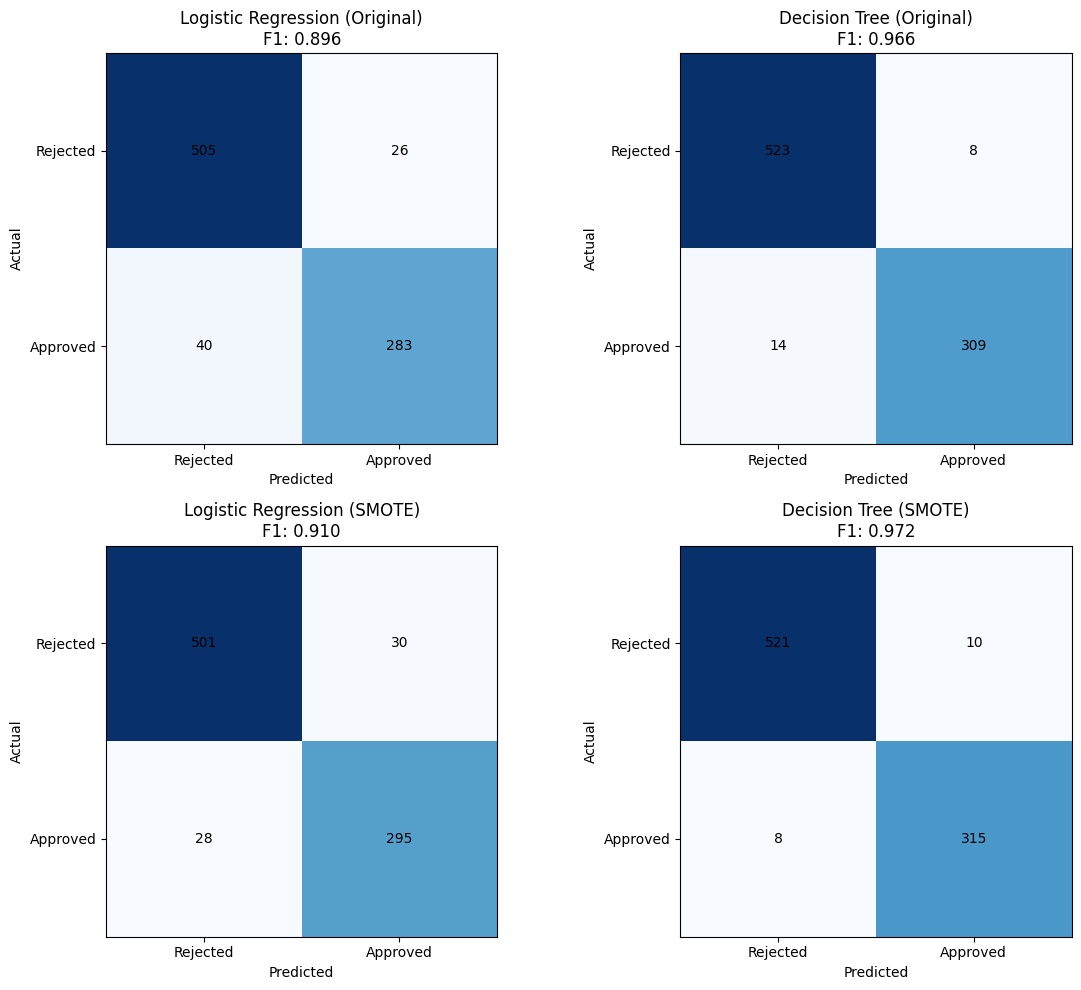

In [113]:
# Plot confusion matrices for best models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, pred)
    
    im = axes[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[i].set_title(f'{name}\nF1: {f1_score(y_test, pred):.3f}')
    
    # Add text annotations
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            axes[i].text(k, j, str(cm[j, k]), ha='center', va='center')
    
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
    axes[i].set_xticklabels(['Rejected', 'Approved'])
    axes[i].set_yticklabels(['Rejected', 'Approved'])

plt.tight_layout()
plt.show()

Top 10 Most Important Features:
                     feature  importance
6                cibil_score    0.862162
5                  loan_term    0.057964
4                loan_amount    0.031539
3               income_annum    0.019631
9        luxury_assets_value    0.007055
0           no_of_dependents    0.006988
10          bank_asset_value    0.006300
7   residential_assets_value    0.004395
2              self_employed    0.002154
8    commercial_assets_value    0.001811


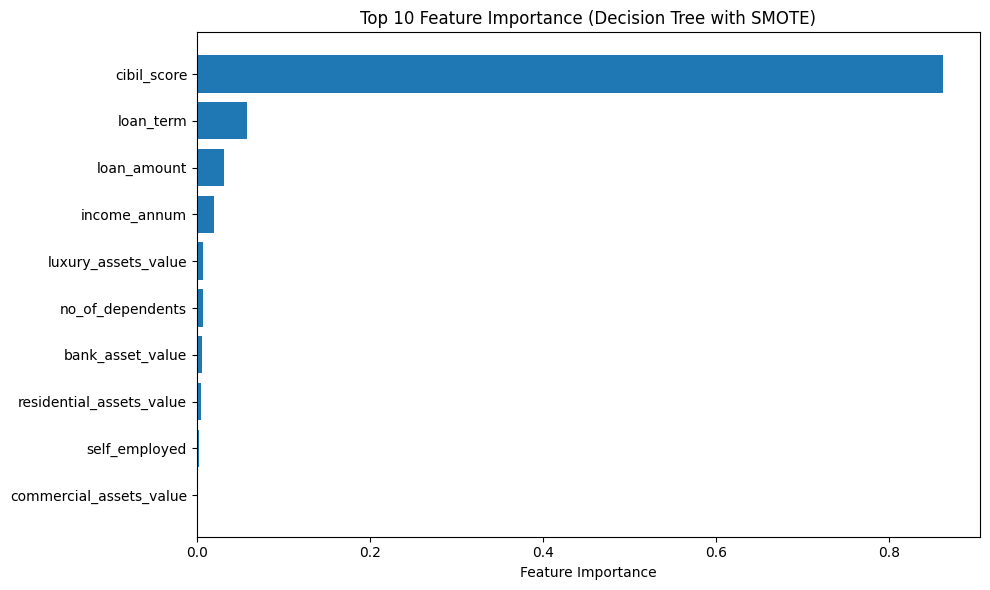

In [114]:
# Feature importance from best decision tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_smote.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (Decision Tree with SMOTE)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()